# Supplementary figures

This notebook is for creation of supplementary figure plots.

## Figure 2 Supplementaries

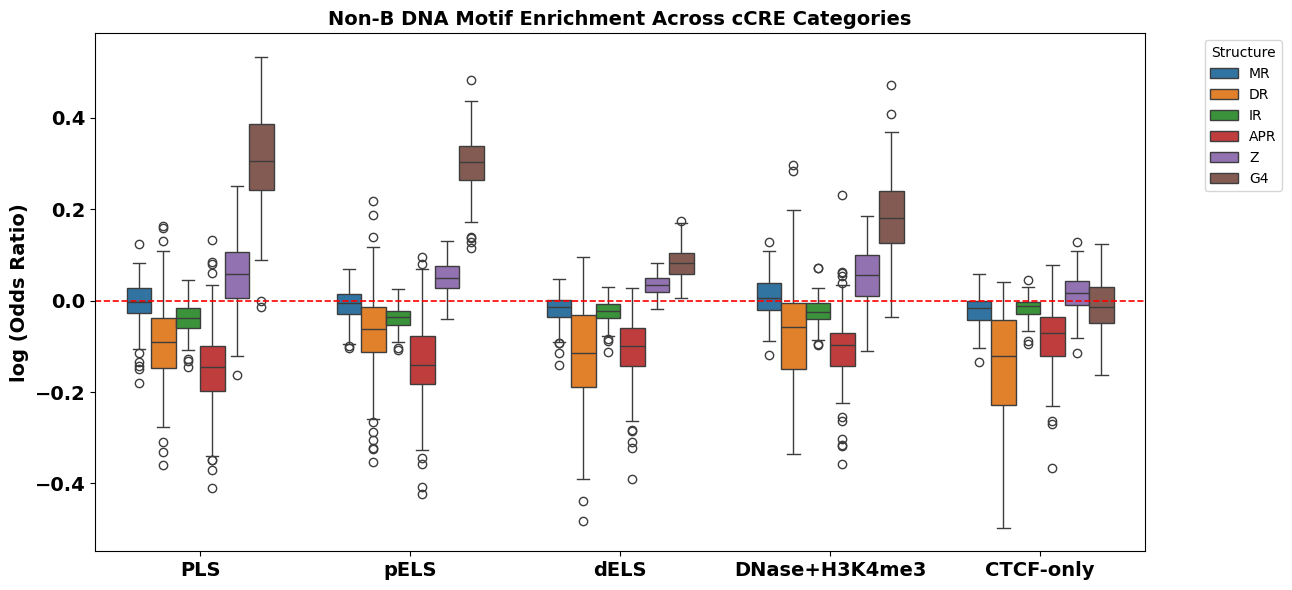

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# ====== CONFIG ======
directory = "/home/alextu/scratch/confidence_intervals_cCRE_results/"
file_names = [
    "final_results_PLS_CI.csv",
    "final_results_pELS_CI.csv",
    "final_results_dELS_CI.csv",
    "final_results_DNase_H3K4me3_CI.csv",
    "final_results_CTCF_only_CI.csv"
]
ccre_labels = {
    "PLS_CI": "PLS",
    "pELS_CI": "pELS",
    "dELS_CI": "dELS",
    "DNase_H3K4me3_CI": "DNase+H3K4me3",
    "CTCF_only_CI": "CTCF-only"
}

# ====== LOAD AND CONCAT ======
dfs = []
for file in file_names:
    path = os.path.join(directory, file)
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue

    df = pd.read_csv(path)
    if "structure" not in df.columns or "odds_ratio" not in df.columns:
        print(f"Skipping {file}: missing columns.")
        continue

    ccre_type = file.replace("final_results_", "").replace(".csv", "")
    df["cCRE_type"] = ccre_labels.get(ccre_type, ccre_type)
    dfs.append(df)

if not dfs:
    raise ValueError("No valid files found.")
    
combined_df = pd.concat(dfs, ignore_index=True)

# Remove invalid ORs (defensive)
combined_df = combined_df[combined_df["odds_ratio"] > 0].copy()

# Log-transform odds ratios (natural log)
combined_df["ln_odds_ratio"] = np.log(combined_df["odds_ratio"])

# ====== PLOT ======
plt.figure(figsize=(13, 6))
sns.boxplot(
    x="cCRE_type",
    y="ln_odds_ratio",
    hue="structure",
    data=combined_df,
    palette="tab10",
    width=0.7
)

# Add reference line
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.2)

# Formatting
plt.xlabel("", fontsize=14)
plt.ylabel("log (Odds Ratio)", fontsize=14, fontweight = 'bold')
plt.title("Non-B DNA Motif Enrichment Across cCRE Categories", fontsize=14, fontweight= 'bold')
plt.xticks(rotation=0, fontsize=14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
    
plt.legend(title="Structure", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig('/home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ccre_all_enrichment.pdf', bbox_inches='tight', dpi=300)

# ====== SHOW ======
plt.show()


## Figure 3 Supplementaries

Number of points assigned to each box (Total Count):
Chromosome: chr1, Count: 32 points
Chromosome: chr2, Count: 43 points
Chromosome: chr3, Count: 18 points
Chromosome: chr4, Count: 31 points
Chromosome: chr5, Count: 25 points
Chromosome: chr6, Count: 39 points
Chromosome: chr7, Count: 28 points
Chromosome: chr8, Count: 45 points
Chromosome: chr9, Count: 39 points
Chromosome: chr10, Count: 48 points
Chromosome: chr11, Count: 29 points
Chromosome: chr12, Count: 39 points
Chromosome: chr13, Count: 29 points
Chromosome: chr14, Count: 58 points
Chromosome: chr15, Count: 52 points
Chromosome: chr16, Count: 30 points
Chromosome: chr17, Count: 32 points
Chromosome: chr18, Count: 20 points
Chromosome: chr19, Count: 30 points
Chromosome: chr20, Count: 30 points
Chromosome: chr21, Count: 45 points
Chromosome: chr22, Count: 33 points
Chromosome: chrX, Count: 32 points
Chromosome: chrY, Count: 14 points


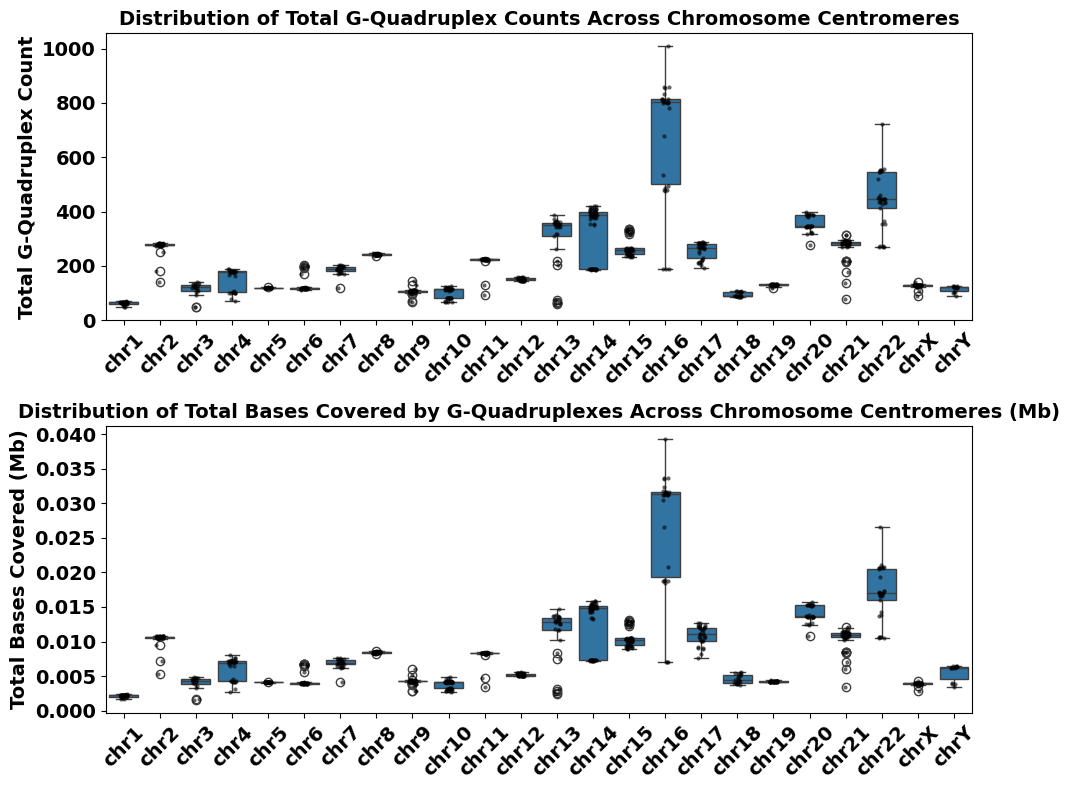

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Hypothetical file paths (assuming they are stored in the same directory)
nonb_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/verkko123_collapsed_summary_metrics_centromere_chr*.csv'))
quadron_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123/verkko123_quadron_collapsed_summary_metrics_centromeres_chr*.csv'))

# Initialize empty lists to hold data
nonb_data = []
quadron_data = []

# Load data from non-B motif files
for file in nonb_files:
    df = pd.read_csv(file)
    nonb_data.append(df)

# Load data from Quadron files and extract chromosome information from the file names
for file in quadron_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    quadron_data.append(df)

# Concatenate data into a single DataFrame for each type
nonb_df = pd.concat(nonb_data, ignore_index=True)
quadron_df = pd.concat(quadron_data, ignore_index=True)

# Combine Positive and Negative G-Quadruplex counts and total bases covered for each sample
g_quad_df = quadron_df[quadron_df['Motif Type'].isin(['Positive_G_Quad', 'Negative_G_Quad'])]
g_quad_df = g_quad_df.groupby(['Sample_Haplotype', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Convert Total Base Coverage from base pairs to megabases (Mb)
g_quad_df['Total Base Coverage'] = g_quad_df['Total Base Coverage'] / 1e6

# Define the order of chromosomes
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']

# Convert Chromosome column to a categorical type with a specific order
g_quad_df['Chromosome'] = pd.Categorical(g_quad_df['Chromosome'], categories=chromosome_order, ordered=True)

# Print the number of points assigned to each box
print("Number of points assigned to each box (Total Count):")
for chrom in chromosome_order:
    count = g_quad_df[g_quad_df['Chromosome'] == chrom]['Sample_Haplotype'].nunique()
    if count > 0:
        print(f"Chromosome: {chrom}, Count: {count} points")

# Plotting the combined G-Quadruplex counts
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Count', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Count', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total G-Quadruplex Counts Across Chromosome Centromeres', fontsize = 14, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Total G-Quadruplex Count', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')

# Plotting the total bases covered by G-Quadruplexes in Mb
plt.subplot(2, 1, 2)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total Bases Covered by G-Quadruplexes Across Chromosome Centromeres (Mb)', fontsize = 14, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Total Bases Covered (Mb)', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.savefig('/home/alextu/projects/def-sushant/alextu/imgs_no_titles2/G4_centromeres.pdf', bbox_inches='tight', dpi=300)

# Show the plots
plt.show()

Number of points assigned to each box (Total Count):
Chromosome: chr2, Count: 6 points
Chromosome: chr4, Count: 13 points
Chromosome: chr6, Count: 34 points
Chromosome: chr8, Count: 3 points
Chromosome: chr9, Count: 1 points
Chromosome: chr10, Count: 6 points
Chromosome: chr12, Count: 12 points
Chromosome: chr16, Count: 22 points
Chromosome: chr17, Count: 24 points
Chromosome: chr19, Count: 1 points
Chromosome: chr20, Count: 15 points
Chromosome: chr22, Count: 2 points
Chromosome: chrX, Count: 2 points


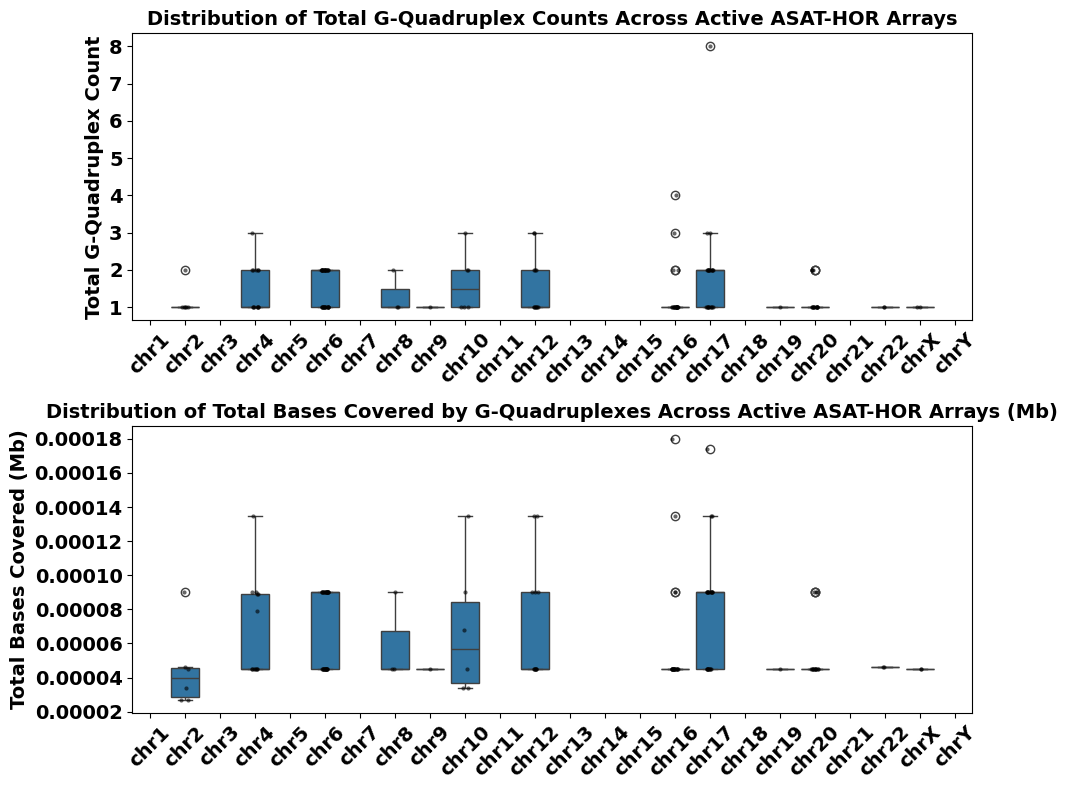

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Hypothetical file paths (assuming they are stored in the same directory)
nonb_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/verkko123_collapsed_summary_metrics_centromere_chr*.csv'))
quadron_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/verkko123_quadron_collapsed_summary_metrics_centromeres_chr*.csv'))

# Initialize empty lists to hold data
nonb_data = []
quadron_data = []

# Load data from non-B motif files
for file in nonb_files:
    df = pd.read_csv(file)
    nonb_data.append(df)

# Load data from Quadron files and extract chromosome information from the file names
for file in quadron_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    quadron_data.append(df)

# Concatenate data into a single DataFrame for each type
nonb_df = pd.concat(nonb_data, ignore_index=True)
quadron_df = pd.concat(quadron_data, ignore_index=True)

# Combine Positive and Negative G-Quadruplex counts and total bases covered for each sample
g_quad_df = quadron_df[quadron_df['Motif Type'].isin(['Positive_G_Quad', 'Negative_G_Quad'])]
g_quad_df = g_quad_df.groupby(['Sample_Haplotype', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Convert Total Base Coverage from base pairs to megabases (Mb)
g_quad_df['Total Base Coverage'] = g_quad_df['Total Base Coverage'] / 1e6

# Define the order of chromosomes
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']

# Convert Chromosome column to a categorical type with a specific order
g_quad_df['Chromosome'] = pd.Categorical(g_quad_df['Chromosome'], categories=chromosome_order, ordered=True)

# Print the number of points assigned to each box
print("Number of points assigned to each box (Total Count):")
for chrom in chromosome_order:
    count = g_quad_df[g_quad_df['Chromosome'] == chrom]['Sample_Haplotype'].nunique()
    if count > 0:
        print(f"Chromosome: {chrom}, Count: {count} points")

# Plotting the combined G-Quadruplex counts
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Count', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Count', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total G-Quadruplex Counts Across Active ASAT-HOR Arrays', fontsize = 14, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Total G-Quadruplex Count', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')

# Plotting the total bases covered by G-Quadruplexes in Mb
plt.subplot(2, 1, 2)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total Bases Covered by G-Quadruplexes Across Active ASAT-HOR Arrays (Mb)', fontsize = 14, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Total Bases Covered (Mb)', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.savefig('/home/alextu/projects/def-sushant/alextu/imgs_no_titles2/G4_asat_arrays.pdf', bbox_inches='tight', dpi=300)

# Show the plots
plt.show()

## Figure 4 Supplementaries

In [8]:
#!/usr/bin/env python3
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==== CONFIG ====
ENRICH_CSV   = "/home/alextu/scratch/confidence_intervals_fixed_segdups_results/final_results_SegDup_FIXED_CI.csv"   # must include columns: sample_hap, structure, odds_ratio, sd_type
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"                 # IGSR/1KGP mapping
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
ORDER_SDTYPE = ["all", "intra", "inter"]  # only plots those present

os.makedirs(OUT_DIR, exist_ok=True)

# ==== Load enrichment ====
df = pd.read_csv(ENRICH_CSV)
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need a 'sample_hap' or 'sample' column to join ancestry.")

# Extract HG/NA root for merge with IGSR
df["Sample name"] = sample_series.astype(str).str.extract(r"^([A-Z]{2}\d{5})", expand=False)

# Keep needed rows/cols
need = {"structure", "odds_ratio", "sd_type", "Sample name"}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"CSV missing required columns: {missing}")
df = df.dropna(subset=["structure", "odds_ratio", "sd_type", "Sample name"])
df = df[df["odds_ratio"] > 0].copy()

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# ONLY CHANGE: log-transform odds ratios
df["ln_odds_ratio"] = np.log(df["odds_ratio"])
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# ==== Load ancestry (robust) ====
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")
anc = anc.rename(columns={c: c.strip().lower().replace(" ", "_") for c in anc.columns})

name_col   = next((c for c in anc.columns if c in {"sample_name","sample","sample_name_id"}), None)
sp_name    = next((c for c in anc.columns if c in {"superpopulation_name","superpopulation"}), None)
sp_code    = next((c for c in anc.columns if c in {"superpopulation_code","superpop_code","superpop"}), None)
if name_col is None:
    raise ValueError("Ancestry file must include a sample name column.")
if sp_name is None and sp_code is None:
    raise ValueError("Ancestry file needs a superpopulation name or code column.")

keep_cols = [name_col]
if sp_name: keep_cols.append(sp_name)
if sp_code: keep_cols.append(sp_code)
anc = anc[keep_cols].drop_duplicates()
anc["Ancestry"] = anc[sp_name] if sp_name else anc[sp_code]
anc = anc.rename(columns={name_col: "Sample name"})

# Optional: map codes to readable names
code_to_name = {
    "AFR":"African Ancestry","AMR":"American Ancestry","EAS":"East Asian Ancestry",
    "EUR":"European Ancestry","SAS":"South Asian Ancestry"
}
anc["Ancestry"] = anc["Ancestry"].replace(code_to_name)

# ==== Merge ====
dfm = df.merge(anc[["Sample name","Ancestry"]], on="Sample name", how="left").dropna(subset=["Ancestry"])

# ==== Palette ====
default_palette = {
    "African Ancestry": "#1f77b4",
    "American Ancestry": "#ff7f0e",
    "East Asian Ancestry": "#2ca02c",
    "European Ancestry": "#9467bd",
    "South Asian Ancestry": "#d62728",
    "AFR": "#1f77b4", "AMR": "#ff7f0e", "EAS": "#2ca02c", "EUR": "#9467bd", "SAS": "#d62728",
}
unique_anc = dfm["Ancestry"].astype(str).unique().tolist()
palette = {
    a: default_palette.get(a, sns.color_palette("tab10")[i % 10])
    for i, a in enumerate(unique_anc)
}

# ==== Plot per SD type ====
present_sdtypes = [s for s in ORDER_SDTYPE if s in dfm["sd_type"].unique()]
for sd in present_sdtypes:
    sub = dfm[dfm["sd_type"] == sd].copy()
    if sub.empty:
        continue

    # Order motifs by median *logged* OR (ONLY CHANGE HERE)
    median_order = (
        sub.groupby("structure", observed=True)["ln_odds_ratio"]
           .median()
           .sort_values(ascending=False)
           .index.tolist()
    )

    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(
        data=sub, x="structure", y="ln_odds_ratio",
        order=median_order, hue="Ancestry", palette=palette,
        fliersize=0.5, linewidth=1.2
    )
    sns.stripplot(
        data=sub, x="structure", y="ln_odds_ratio",
        order=median_order, hue="Ancestry", dodge=True,
        palette={a: "black" for a in sub["Ancestry"].unique()},
        size=2.5, alpha=0.35
    )

    # Clean double legend
    handles, labels = ax.get_legend_handles_labels()
    n = len(sub["Ancestry"].unique())
    ax.legend(handles[:n], labels[:n], title="Superpopulation",
              bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

    # Reference line at ln(OR) = 0 (ONLY CHANGE HERE)
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)

    plt.xlabel("", fontsize=14, fontweight="bold")
    plt.xticks(fontsize=14, fontweight="bold")
    plt.ylabel("log(Odds Ratio)", fontsize=14, fontweight="bold")
    plt.yticks(fontsize=14, fontweight="bold")
    plt.title(f"Enrichment in Fixed SDs ({sd}) by Structure and Ancestry",
              fontsize=14, fontweight="bold")

    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(
        OUT_DIR, f"overall_nonB_segdup_enrichment_BY_ANCESTRY_{sd}.pdf"
    )
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"[saved] {out_pdf}")

[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/overall_nonB_segdup_enrichment_BY_ANCESTRY_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/overall_nonB_segdup_enrichment_BY_ANCESTRY_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/overall_nonB_segdup_enrichment_BY_ANCESTRY_inter.pdf


In [7]:
#!/usr/bin/env python3
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== CONFIG ======
ENRICH_CSV   = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_G4_stable_vs_unstable_SegDup_FIXED.csv"  # must have sd_type
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
ORDER_STRUCT = ["G4_stable", "G4_unstable"]
ORDER_SDTYPE = ["all", "intra", "inter"]  # will auto-subset to present
os.makedirs(OUT_DIR, exist_ok=True)

# ====== LOAD ENRICHMENT ======
df = pd.read_csv(ENRICH_CSV)

# keep only stable/unstable G4 rows
df = df[df["structure"].isin(ORDER_STRUCT)].copy()

# extract sample root for ancestry merge
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need 'sample_hap' or 'sample' to join ancestry.")

df["Sample name"] = sample_series.astype(str).str.extract(r"^([A-Z]{2}\d{5})", expand=False)
need = {"structure","odds_ratio","sd_type","Sample name"}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"CSV missing columns: {missing}")
df = df.dropna(subset=list(need))
df = df[df["odds_ratio"] > 0]

# ====== LOAD ANCESTRY (robust) ======
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")
anc = anc.rename(columns={c: c.strip().lower().replace(" ", "_") for c in anc.columns})
name_col = next((c for c in anc.columns if c in {"sample_name","sample","sample_name_id"}), None)
sp_name  = next((c for c in anc.columns if c in {"superpopulation_name","superpopulation"}), None)
sp_code  = next((c for c in anc.columns if c in {"superpopulation_code","superpop_code","superpop"}), None)
if name_col is None:
    raise ValueError("Ancestry file needs a sample name column.")
if sp_name is None and sp_code is None:
    raise ValueError("Ancestry file needs a superpopulation name or code.")

keep = [name_col] + ([sp_name] if sp_name else []) + ([sp_code] if sp_code else [])
anc = anc[keep].drop_duplicates()
anc["Ancestry"] = anc[sp_name] if sp_name else anc[sp_code]
anc = anc.rename(columns={name_col: "Sample name"})

# Optional mapping codes -> names
code_to_name = {"AFR":"African Ancestry","AMR":"American Ancestry","EAS":"East Asian Ancestry",
                "EUR":"European Ancestry","SAS":"South Asian Ancestry"}
anc["Ancestry"] = anc["Ancestry"].replace(code_to_name)

# ====== MERGE ======
df = df.merge(anc[["Sample name","Ancestry"]], on="Sample name", how="left").dropna(subset=["Ancestry"])

# ====== PALETTES ======
anc_default = {
    "African Ancestry": "#1f77b4",
    "American Ancestry": "#ff7f0e",
    "East Asian Ancestry": "#2ca02c",
    "European Ancestry": "#9467bd",
    "South Asian Ancestry": "#d62728",
}
def build_anc_palette(series):
    uniq = series.astype(str).unique().tolist()
    pal = {}
    tab10 = sns.color_palette("tab10", n_colors=max(10, len(uniq)))
    for i, a in enumerate(uniq):
        pal[a] = anc_default.get(a, tab10[i % len(tab10)])
    return pal

# ====== PLOT ONE FIGURE PER SD TYPE ======
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]
for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    anc_palette = build_anc_palette(sub["Ancestry"])

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", palette=anc_palette,
        fliersize=0.5, linewidth=1.2
    )
    sns.stripplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", dodge=True,
        color="black", size=2.5, alpha=0.35
    )

    # clean doubled legend (from box + strip)
    handles, labels = ax.get_legend_handles_labels()
    n = sub["Ancestry"].nunique()
    ax.legend(handles[:n], labels[:n], title="Ancestry",
              bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

    plt.axhline(1, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("")
    plt.xticks(fontsize=14, fontweight="bold")
    plt.yticks(fontsize=14, fontweight="bold")
    plt.ylabel("Odds Ratio", fontsize=14, fontweight="bold")
    plt.title(f"G4 Stable vs Unstable in Fixed SDs by Ancestry ({sd})",
              fontsize=14, fontweight="bold")
    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(OUT_DIR, f"stable_unstable_g4_segdup_by_ancestry_{sd}.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"[saved] {out_pdf}")

/tmp/ipykernel_3920970/3609260677.py:93: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_3920970/3609260677.py:93: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/stable_unstable_g4_segdup_by_ancestry_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/stable_unstable_g4_segdup_by_ancestry_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/stable_unstable_g4_segdup_by_ancestry_inter.pdf


/tmp/ipykernel_3920970/3609260677.py:93: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


In [4]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ====== CONFIG ======
ENRICH_CSV   = "/home/alextu/scratch/confidence_intervals_fixed_segdups_results/final_results_G4_stable_vs_unstable_SegDup_FIXED_ONE_TABLE_CI.csv"
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
ORDER_SDTYPE = ["all", "intra", "inter"]
ANCESTRY_ORDER = ["AFR", "AMR", "EAS", "EUR", "SAS"]

os.makedirs(OUT_DIR, exist_ok=True)

# ====== LOAD ENRICHMENT ======
df = pd.read_csv(ENRICH_CSV)

# Keep only the intended comparison
df = df[df["comparison"] == "G4_stable_vs_unstable"].copy()

# Extract sample name (HGxxxxx)
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need 'sample_hap' or 'sample' column.")

df["Sample name"] = sample_series.astype(str).str.extract(
    r"^([A-Z]{2}\d{5})", expand=False
)

required = {"Sample name", "odds_ratio", "sd_type"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"Missing required columns: {missing}")

df = df.dropna(subset=list(required))
df = df[df["odds_ratio"] > 0].copy()

# Log-transform ORs
df["ln_odds_ratio"] = np.log(df["odds_ratio"])

# ====== LOAD ANCESTRY — FORCE CODE COLUMN ======
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")

# Normalize column names
anc.columns = [c.strip().lower().replace(" ", "_") for c in anc.columns]

# Explicitly require SUPERPOPULATION CODE
if "superpopulation_code" in anc.columns:
    sp_code_col = "superpopulation_code"
elif "superpop_code" in anc.columns:
    sp_code_col = "superpop_code"
elif "superpop" in anc.columns:
    sp_code_col = "superpop"
else:
    raise ValueError(
        "Could not find superpopulation CODE column "
        "(expected one of: superpopulation_code, superpop_code, superpop)"
    )

# Explicitly require sample name
if "sample_name" in anc.columns:
    name_col = "sample_name"
elif "sample" in anc.columns:
    name_col = "sample"
else:
    raise ValueError("Could not find sample name column in ancestry file.")

anc = anc[[name_col, sp_code_col]].drop_duplicates()
anc = anc.rename(columns={
    name_col: "Sample name",
    sp_code_col: "Ancestry"
})

# Enforce valid codes only
anc = anc[anc["Ancestry"].isin(ANCESTRY_ORDER)]

# ====== MERGE ======
df = df.merge(anc, on="Sample name", how="left")
df = df.dropna(subset=["Ancestry"])

# ====== PALETTE (CODES) ======
anc_palette = {
    "AFR": "#1f77b4",
    "AMR": "#ff7f0e",
    "EAS": "#2ca02c",
    "EUR": "#9467bd",
    "SAS": "#d62728",
}

# ====== PLOT ONE FIGURE PER SD TYPE ======
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]

for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    # Enforce ancestry order
    sub["Ancestry"] = pd.Categorical(
        sub["Ancestry"],
        categories=ANCESTRY_ORDER,
        ordered=True
    )

    plt.figure(figsize=(7, 6))
    ax = sns.boxplot(
        data=sub,
        x="Ancestry",
        y="ln_odds_ratio",
        palette=anc_palette,
        fliersize=0.5,
        linewidth=1.2
    )

    sns.stripplot(
        data=sub,
        x="Ancestry",
        y="ln_odds_ratio",
        color="black",
        size=2.5,
        alpha=0.4,
        jitter=True
    )

    plt.axhline(0, color="gray", linestyle="--", linewidth=1)

    plt.xlabel("")
    plt.ylabel("log(Odds Ratio)", fontsize=14, fontweight="bold")
    plt.xticks(fontsize=14, fontweight="bold")
    plt.yticks(fontsize=14, fontweight="bold")

    plt.title(
        f"G4 Stable vs Unstable Enrichment in Fixed SDs ({sd})",
        fontsize=14,
        fontweight="bold"
    )

    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(
        OUT_DIR,
        f"g4_stable_vs_unstable_segdup_by_ancestry_{sd}.pdf"
    )
    plt.savefig(out_pdf, dpi=300)
    plt.close()

    print(f"[saved] {out_pdf}")

/tmp/ipykernel_3998678/2433367833.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_3998678/2433367833.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_vs_unstable_segdup_by_ancestry_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_vs_unstable_segdup_by_ancestry_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/g4_stable_vs_unstable_segdup_by_ancestry_inter.pdf


/tmp/ipykernel_3998678/2433367833.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


In [4]:
#!/usr/bin/env python3
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== CONFIG ======
ENRICH_CSV   = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/segdup_analysis/fixed_SDs/final_results_IR_stable_vs_unstable_SegDup_FIXED.csv"  # must have: sample_hap (or sample), structure, odds_ratio, sd_type
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"
ORDER_STRUCT = ["IR_stable", "IR_unstable"]
ORDER_SDTYPE = ["all", "intra", "inter"]  # auto-subset to those present

os.makedirs(OUT_DIR, exist_ok=True)

# ====== LOAD ENRICHMENT ======
df = pd.read_csv(ENRICH_CSV)

# keep only IR rows
df = df[df["structure"].isin(ORDER_STRUCT)].copy()

# extract sample root for ancestry merge
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need 'sample_hap' or 'sample' to join ancestry.")

df["Sample name"] = sample_series.astype(str).str.extract(r"^([A-Z]{2}\d{5})", expand=False)

need = {"structure","odds_ratio","sd_type","Sample name"}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"CSV missing columns: {missing}")

df = df.dropna(subset=list(need))
df = df[df["odds_ratio"] > 0]

# ====== LOAD ANCESTRY (robust) ======
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")
anc = anc.rename(columns={c: c.strip().lower().replace(" ", "_") for c in anc.columns})

name_col = next((c for c in anc.columns if c in {"sample_name","sample","sample_name_id"}), None)
sp_name  = next((c for c in anc.columns if c in {"superpopulation_name","superpopulation"}), None)
sp_code  = next((c for c in anc.columns if c in {"superpopulation_code","superpop_code","superpop"}), None)

if name_col is None:
    raise ValueError("Ancestry file needs a sample name column.")
if sp_name is None and sp_code is None:
    raise ValueError("Ancestry file needs a superpopulation name or code.")

keep = [name_col] + ([sp_name] if sp_name else []) + ([sp_code] if sp_code else [])
anc = anc[keep].drop_duplicates()
anc["Ancestry"] = anc[sp_name] if sp_name else anc[sp_code]
anc = anc.rename(columns={name_col: "Sample name"})

# Optional mapping codes -> readable names
code_to_name = {"AFR":"African Ancestry","AMR":"American Ancestry","EAS":"East Asian Ancestry",
                "EUR":"European Ancestry","SAS":"South Asian Ancestry"}
anc["Ancestry"] = anc["Ancestry"].replace(code_to_name)

# ====== MERGE ======
df = df.merge(anc[["Sample name","Ancestry"]], on="Sample name", how="left").dropna(subset=["Ancestry"])

# ====== PALETTES ======
anc_default = {
    "African Ancestry": "#1f77b4",
    "American Ancestry": "#ff7f0e",
    "East Asian Ancestry": "#2ca02c",
    "European Ancestry": "#9467bd",
    "South Asian Ancestry": "#d62728",
}
def build_anc_palette(series):
    uniq = series.astype(str).unique().tolist()
    pal = {}
    tab10 = sns.color_palette("tab10", n_colors=max(10, len(uniq)))
    for i, a in enumerate(uniq):
        pal[a] = anc_default.get(a, tab10[i % len(tab10)])
    return pal

# ====== PLOT ONE FIGURE PER SD TYPE ======
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]
for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    anc_palette = build_anc_palette(sub["Ancestry"])

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", palette=anc_palette,
        fliersize=0.5, linewidth=1.2
    )
    sns.stripplot(
        data=sub, x="structure", y="odds_ratio",
        order=ORDER_STRUCT, hue="Ancestry", dodge=True,
        color="black", size=2.5, alpha=0.35
    )

    # clean doubled legend (from box + strip)
    handles, labels = ax.get_legend_handles_labels()
    n = sub["Ancestry"].nunique()
    ax.legend(handles[:n], labels[:n], title="Ancestry",
              bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

    plt.axhline(1, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("")
    plt.xticks(fontsize=14, fontweight="bold")
    plt.yticks(fontsize=14, fontweight="bold")
    plt.ylabel("Odds Ratio", fontsize=14, fontweight="bold")
    plt.title(f"IR Stable vs Unstable in Fixed SDs by Ancestry ({sd})",
              fontsize=14, fontweight="bold")
    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(OUT_DIR, f"stable_unstable_ir_segdup_by_ancestry_{sd}.pdf")
    plt.savefig(out_pdf, dpi=300)
    plt.close()
    print(f"[saved] {out_pdf}")

/tmp/ipykernel_3606545/3415126924.py:98: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_3606545/3415126924.py:98: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/stable_unstable_ir_segdup_by_ancestry_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/stable_unstable_ir_segdup_by_ancestry_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/stable_unstable_ir_segdup_by_ancestry_inter.pdf


/tmp/ipykernel_3606545/3415126924.py:98: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


In [6]:
#!/usr/bin/env python3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ====== CONFIG ======
ENRICH_CSV   = "/home/alextu/scratch/confidence_intervals_fixed_segdups_results/final_results_IR_stable_vs_unstable_SegDup_FIXED_ONE_TABLE_CI.csv"
ANCESTRY_CSV = "/home/alextu/scratch/igsr_samples.tsv"
OUT_DIR      = "/home/alextu/projects/def-sushant/alextu/imgs_no_titles2"

ORDER_SDTYPE     = ["all", "intra", "inter"]
ANCESTRY_ORDER   = ["AFR", "AMR", "EAS", "EUR", "SAS"]

os.makedirs(OUT_DIR, exist_ok=True)

# ====== LOAD ENRICHMENT ======
df = pd.read_csv(ENRICH_CSV)

# Force intended comparison
df = df[df["comparison"] == "IR_stable_vs_unstable"].copy()

# Extract sample name (HGxxxxx)
if "sample_hap" in df.columns:
    sample_series = df["sample_hap"]
elif "sample" in df.columns:
    sample_series = df["sample"]
else:
    raise ValueError("Need 'sample_hap' or 'sample' column.")

df["Sample name"] = sample_series.astype(str).str.extract(
    r"^([A-Z]{2}\d{5})", expand=False
)

required = {"Sample name", "odds_ratio", "sd_type"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"Missing required columns: {missing}")

df = df.dropna(subset=list(required))
df = df[df["odds_ratio"] > 0].copy()

# Log-transform ORs
df["ln_odds_ratio"] = np.log(df["odds_ratio"])

# ====== LOAD ANCESTRY — FORCE SUPERPOP CODES ======
anc = pd.read_csv(ANCESTRY_CSV, sep=None, engine="python")
anc.columns = [c.strip().lower().replace(" ", "_") for c in anc.columns]

# Require code column explicitly
if "superpopulation_code" in anc.columns:
    sp_code_col = "superpopulation_code"
elif "superpop_code" in anc.columns:
    sp_code_col = "superpop_code"
elif "superpop" in anc.columns:
    sp_code_col = "superpop"
else:
    raise ValueError(
        "Could not find superpopulation CODE column "
        "(expected superpopulation_code / superpop_code / superpop)"
    )

# Require sample name
if "sample_name" in anc.columns:
    name_col = "sample_name"
elif "sample" in anc.columns:
    name_col = "sample"
else:
    raise ValueError("Could not find sample name column in ancestry file.")

anc = anc[[name_col, sp_code_col]].drop_duplicates()
anc = anc.rename(columns={
    name_col: "Sample name",
    sp_code_col: "Ancestry"
})

# Keep valid codes only
anc = anc[anc["Ancestry"].isin(ANCESTRY_ORDER)]

# ====== MERGE ======
df = df.merge(anc, on="Sample name", how="left")
df = df.dropna(subset=["Ancestry"])

# ====== PALETTE (CODES) ======
anc_palette = {
    "AFR": "#1f77b4",
    "AMR": "#ff7f0e",
    "EAS": "#2ca02c",
    "EUR": "#9467bd",
    "SAS": "#d62728",
}

# ====== PLOT ONE FIGURE PER SD TYPE ======
present_sdtypes = [s for s in ORDER_SDTYPE if s in df["sd_type"].unique()]

for sd in present_sdtypes:
    sub = df[df["sd_type"] == sd].copy()
    if sub.empty:
        continue

    sub["Ancestry"] = pd.Categorical(
        sub["Ancestry"],
        categories=ANCESTRY_ORDER,
        ordered=True
    )

    plt.figure(figsize=(7, 6))
    ax = sns.boxplot(
        data=sub,
        x="Ancestry",
        y="ln_odds_ratio",
        palette=anc_palette,
        fliersize=0.5,
        linewidth=1.2
    )

    sns.stripplot(
        data=sub,
        x="Ancestry",
        y="ln_odds_ratio",
        color="black",
        size=2.5,
        alpha=0.4,
        jitter=True
    )

    # Reference line: ln(OR) = 0
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)

    plt.xlabel("")
    plt.ylabel("log(Odds Ratio)", fontsize=14, fontweight="bold")
    plt.xticks(fontsize=14, fontweight="bold")
    plt.yticks(fontsize=14, fontweight="bold")

    plt.title(
        f"IR Stable vs Unstable Enrichment in Fixed SDs ({sd})",
        fontsize=14,
        fontweight="bold"
    )

    sns.despine()
    plt.tight_layout()

    out_pdf = os.path.join(
        OUT_DIR,
        f"ir_stable_vs_unstable_segdup_by_ancestry_{sd}.pdf"
    )
    plt.savefig(out_pdf, dpi=300)
    plt.close()

    print(f"[saved] {out_pdf}")

/tmp/ipykernel_3998678/3921123260.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_vs_unstable_segdup_by_ancestry_all.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_vs_unstable_segdup_by_ancestry_intra.pdf
[saved] /home/alextu/projects/def-sushant/alextu/imgs_no_titles2/ir_stable_vs_unstable_segdup_by_ancestry_inter.pdf


/tmp/ipykernel_3998678/3921123260.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_3998678/3921123260.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


## Figure 5 Supplementaries

## Figure 6 Supplementaries